In [1]:
from readability import Readability
import textstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
plt.rcParams["font.family"] = "Times"

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## GSM8K

In [2]:
gsm8k = pd.read_csv('data/gsm8k_questions.csv')
gsm8k_grades = []
for i in range(0, len(gsm8k)):
    text = gsm8k.iloc[i]['instruction']
    grade = textstat.flesch_kincaid_grade(text)
    if grade < -3.40:
        grade = -3.40
    gsm8k_grades.append(grade)
print(np.mean(gsm8k_grades), max(gsm8k_grades), min(gsm8k_grades))

4.275998903433623 26.3 -3.4


## NumGlue

In [3]:
numglue = pd.read_csv('data/numglue_questions.csv')
numglue_grades = []
for i in range(0, len(numglue)):
    text = numglue.iloc[i]['instruction']
    text = str(text)
    grade = textstat.flesch_kincaid_grade(text)
    if grade < -3.40:
        grade = -3.40
    numglue_grades.append(grade)
print(np.mean(numglue_grades), max(numglue_grades), min(numglue_grades))

9.073163128989165 46.9 -3.4


## ASDIV

In [4]:
asdiv = pd.read_csv('data/ASDIV_clean.csv')
asdiv_grades = []
for i in range(0, len(asdiv)):
    text = asdiv.iloc[i]['question']
    text = str(text)
    grade = textstat.flesch_kincaid_grade(text)
    if grade < -3.40:
        grade = -3.40
    asdiv_grades.append(grade)
print(np.mean(asdiv_grades), max(asdiv_grades), min(asdiv_grades))

3.5560954446854667 13.8 -1.9


## SVAMP

In [5]:
svamp = pd.read_json('data/svamp.json')
svamp['question'] = svamp['Body'] + " " + svamp['Question']
svamp_grades = []
for i in range(0, len(svamp)):
    text = svamp.iloc[i]['question']
    text = str(text)
    grade = textstat.flesch_kincaid_grade(text)
    if grade < -3.40:
        grade = -3.40
    svamp_grades.append(grade)
print(np.mean(svamp_grades), max(svamp_grades), min(svamp_grades))

3.3919 12.1 -1.2


## MATHWELL Annotated

In [6]:
def readability(df):
    grades = []
    for i in range(0, len(df)):
        text = df.iloc[i]['question']
        text = str(text)
        grade = textstat.flesch_kincaid_grade(text)
        if grade < -3.40:
            grade = -3.40
        grades.append(grade)
    return grades
def readability_all(df):
    grades = []
    for i in range(0, len(df)):
        text = df.iloc[i]['text']
        text = str(text)
        grade = textstat.flesch_kincaid_grade(text)
        if grade < -3.40:
            grade = -3.40
        grades.append(grade)
    return grades

In [7]:
mathwell_an = pd.read_csv('data/mathwell_questions.csv')
mathwell_an

,Unnamed: 0,question
0,0,LeBron James has 30000 points. He has 1000 mor...
1,1,A class has 120 students. 40 of them are in th...
2,3,A 3-pound cake of butter is 90% fat. 3.5 ounce...
3,4,A train is 1500 feet long. 200 of its cars are...
4,5,Naruto has 5000 ryo. He spends 1000 ryo on a n...
...,...,...
3229,420,A field hockey game has 11 players per team. T...
3230,421,100 turtles are at the pond. 10 turtles are ea...
3231,422,Barbie has 1200 Instagram followers. 200 more ...
3232,423,1234567890 is a 10-digit number. \nHow many 3-...


In [8]:
mathwell_an_grades = readability(mathwell_an)
print(np.mean(mathwell_an_grades), max(mathwell_an_grades), min(mathwell_an_grades))

2.5516697588126163 13.4 -3.4


In [9]:
mathwell_train = pd.read_csv('data/mathwell_good_questions.csv')
mathwell_train_grades = readability(mathwell_train)
print(np.mean(mathwell_train_grades), max(mathwell_train_grades), min(mathwell_train_grades))

2.5057187827911855 12.2 -3.1


## MATHWELL Final Questions

In [10]:
mathwell_all = pd.read_csv('data/mathwell_solvability.csv')
mathwell_all_grades = readability_all(mathwell_all)
print(np.mean(mathwell_all_grades), max(mathwell_all_grades), min(mathwell_all_grades))

2.3388 6.8 -2.3


In [11]:
mathwell_good = pd.read_csv('data/mathwell_good.csv')
mathwell_good_grades = readability(mathwell_good)
print(np.mean(mathwell_good_grades), max(mathwell_good_grades), min(mathwell_good_grades))

2.496276595744681 6.8 -2.3


## Llama Questions

In [12]:
llama_all = pd.read_csv('data/llama_solvability.csv')
llama_all_grades = readability_all(llama_all)
print(np.mean(llama_all_grades), max(llama_all_grades), min(llama_all_grades))

2.2536 10.3 -2.0


In [13]:
llama_good = pd.read_csv('data/llama_good.csv')
llama_good_grades = readability(llama_good)
print(np.mean(llama_good_grades), max(llama_good_grades), min(llama_good_grades))

2.2554140127388536 6.9 -2.0


## Llema Questions

In [14]:
llema_all = pd.read_csv('data/llema_solvability.csv')
llema_all_grades = readability_all(llema_all)
print(np.mean(llema_all_grades), max(llema_all_grades), min(llema_all_grades))

3.3308 11.1 -1.5


In [15]:
llema_good = pd.read_csv('data/llema_good.csv')
llema_good_grades = readability(llema_good)
print(np.mean(llema_good_grades), max(llema_good_grades), min(llema_good_grades))

3.0487804878048785 7.2 -1.0


## Mammoth Questions

In [16]:
mammoth_all = pd.read_csv('data/mammoth_solvability.csv')
mammoth_all_grades = readability_all(mammoth_all)
print(np.mean(mammoth_all_grades), max(mammoth_all_grades), min(mammoth_all_grades))

2.872 10.7 -1.7


In [17]:
mammoth_good = pd.read_csv('data/mammoth_good.csv')
mammoth_good_grades = readability(mammoth_good)
print(np.mean(mammoth_good_grades), max(mammoth_good_grades), min(mammoth_good_grades))

2.78 10.7 -1.7


## Plot Distributions

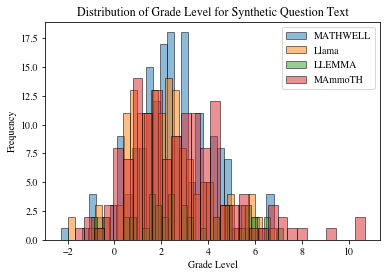

In [18]:
# Create a histogram
plt.hist(mathwell_good_grades, bins=30, alpha=0.5, label='MATHWELL', edgecolor='black')
plt.hist(llama_good_grades, bins=30, alpha=0.5, label='Llama', edgecolor='black')
plt.hist(llema_good_grades, bins=30, alpha=0.5, label='LLEMMA', edgecolor='black')
plt.hist(mammoth_good_grades, bins=30, alpha=0.5, label='MAmmoTH', edgecolor='black')

# Customize the plot
plt.title('Distribution of Grade Level for Synthetic Question Text')
plt.xlabel('Grade Level')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

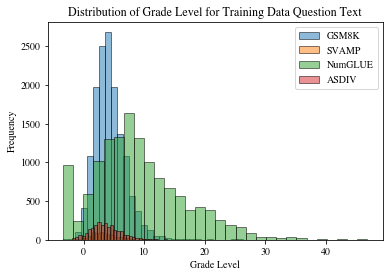

In [19]:
# Create a histogram
plt.hist(gsm8k_grades, bins=30, alpha=0.5, label='GSM8K', edgecolor='black')
plt.hist(svamp_grades, bins=30, alpha=0.5, label='SVAMP', edgecolor='black')
plt.hist(numglue_grades, bins=30, alpha=0.5, label='NumGLUE', edgecolor='black')
plt.hist(asdiv_grades, bins=30, alpha=0.5, label='ASDIV', edgecolor='black')

# Customize the plot
plt.title('Distribution of Grade Level for Training Data Question Text')
plt.xlabel('Grade Level')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

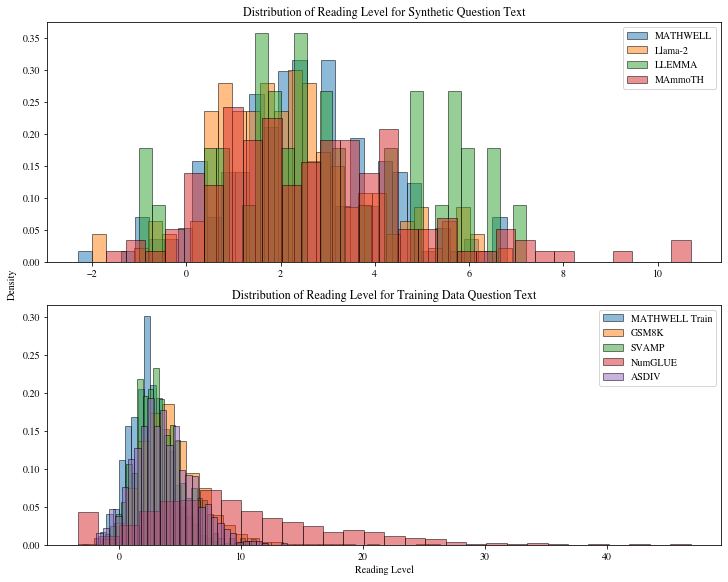

<Figure size 432x288 with 0 Axes>

In [20]:
# Create a figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot the first histogram on the top subplot
axs[0].hist(mathwell_good_grades, bins=30, alpha=0.5, label='MATHWELL', edgecolor='black', density=True)
axs[0].hist(llama_good_grades, bins=30, alpha=0.5, label='Llama-2', edgecolor='black', density=True)
axs[0].hist(llema_good_grades, bins=30, alpha=0.5, label='LLEMMA', edgecolor='black', density=True)
axs[0].hist(mammoth_good_grades, bins=30, alpha=0.5, label='MAmmoTH', edgecolor='black', density=True)
axs[0].legend()
axs[0].set_title('Distribution of Reading Level for Synthetic Question Text')

# Plot the second histogram on the bottom subplot
axs[1].hist(mathwell_train_grades, bins=30, alpha=0.5, label='MATHWELL Train', edgecolor='black', density=True)
axs[1].hist(gsm8k_grades, bins=30, alpha=0.5, label='GSM8K', edgecolor='black', density=True)
axs[1].hist(svamp_grades, bins=30, alpha=0.5, label='SVAMP', edgecolor='black', density=True)
axs[1].hist(numglue_grades, bins=30, alpha=0.5, label='NumGLUE', edgecolor='black', density=True)
axs[1].hist(asdiv_grades, bins=30, alpha=0.5, label='ASDIV', edgecolor='black', density=True)
axs[1].legend()
axs[1].set_title('Distribution of Reading Level for Training Data Question Text')

# Customize the overall layout
plt.tight_layout()
plt.xlabel('Reading Level')
fig.text(0.0, 0.5, 'Density', ha='center', va='center', rotation='vertical')

# Show the plot
plt.show()
plt.savefig('reading_level_his.png')

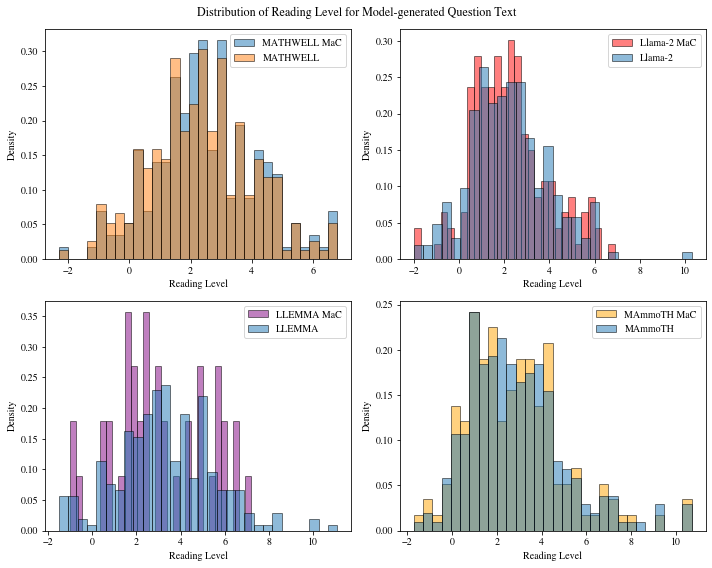

In [25]:
# Create a figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first histogram on the top subplot
fig.suptitle('Distribution of Reading Level for Model-generated Question Text')
axs[0, 0].hist(mathwell_good_grades, bins=30, alpha=0.5, label='MATHWELL MaC', edgecolor='black', density=True)
axs[0, 1].hist(llama_good_grades, bins=30, alpha=0.5, label='Llama-2 MaC', edgecolor='black', density=True, color = 'Red')
axs[1, 0].hist(llema_good_grades, bins=30, alpha=0.5, label='LLEMMA MaC', edgecolor='black', density=True, color = 'Purple')
axs[1, 1].hist(mammoth_good_grades, bins=30, alpha=0.5, label='MAmmoTH MaC', edgecolor='black', density=True, color= 'Orange')
axs[0, 0].hist(mathwell_all_grades, bins=30, alpha=0.5, label='MATHWELL', edgecolor='black', density=True)
axs[0, 1].hist(llama_all_grades, bins=30, alpha=0.5, label='Llama-2', edgecolor='black', density=True)
axs[1, 0].hist(llema_all_grades, bins=30, alpha=0.5, label='LLEMMA', edgecolor='black', density=True)
axs[1, 1].hist(mammoth_all_grades, bins=30, alpha=0.5, label='MAmmoTH', edgecolor='black', density=True)
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
axs[0, 0].set_xlabel('Reading Level')
axs[0, 0].set_ylabel('Density')
axs[0, 1].set_xlabel('Reading Level')
axs[0, 1].set_ylabel('Density')
axs[1, 0].set_xlabel('Reading Level')
axs[1, 0].set_ylabel('Density')
axs[1, 1].set_xlabel('Reading Level')
axs[1, 1].set_ylabel('Density')

# Customize the overall layout
plt.tight_layout()
plt.savefig('reading_level_models.png')

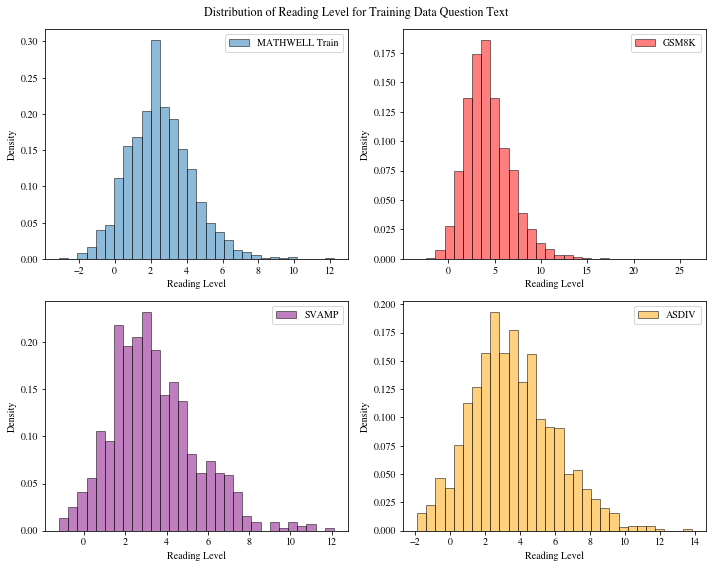

In [22]:
# Create a figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axs[0,0].hist(mathwell_train_grades, bins=30, alpha=0.5, label='MATHWELL Train', edgecolor='black', density=True)
axs[0,1].hist(gsm8k_grades, bins=30, alpha=0.5, label='GSM8K', edgecolor='black', density=True, color = "Red")
axs[1,0].hist(svamp_grades, bins=30, alpha=0.5, label='SVAMP', edgecolor='black', density=True, color = "Purple")
axs[1,1].hist(asdiv_grades, bins=30, alpha=0.5, label='ASDIV', edgecolor='black', density=True, color = "Orange")
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
axs[0, 0].set_xlabel('Reading Level')
axs[0, 0].set_ylabel('Density')
axs[0, 1].set_xlabel('Reading Level')
axs[0, 1].set_ylabel('Density')
axs[1, 0].set_xlabel('Reading Level')
axs[1, 0].set_ylabel('Density')
axs[1, 1].set_xlabel('Reading Level')
axs[1, 1].set_ylabel('Density')
fig.suptitle('Distribution of Reading Level for Training Data Question Text')

# Customize the overall layout
plt.tight_layout()
plt.savefig('reading_level_datasets.png')

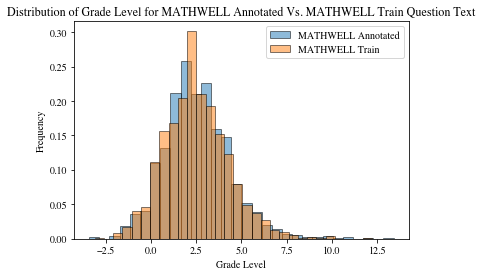

In [23]:
# Create a histogram
plt.hist(mathwell_an_grades, bins=30, alpha=0.5, label='MATHWELL Annotated', edgecolor='black', density=True)
plt.hist(mathwell_train_grades, bins=30, alpha=0.5, label='MATHWELL Train', edgecolor='black', density=True)

# Customize the plot
plt.title('Distribution of Grade Level for MATHWELL Annotated Vs. MATHWELL Train Question Text')
plt.xlabel('Grade Level')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

Text(0.0, 0.5, 'Density')

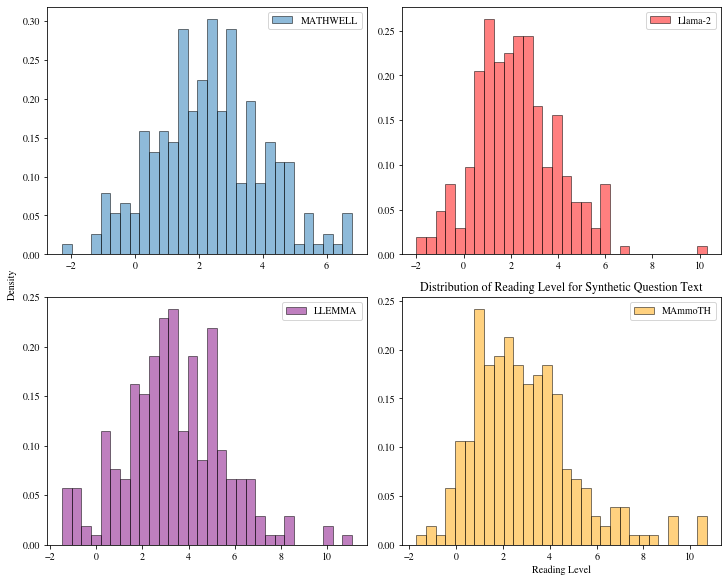

In [24]:
# Create a figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first histogram on the top subplot
plt.title('Distribution of Reading Level for Synthetic Question Text')
axs[0, 0].hist(mathwell_all_grades, bins=30, alpha=0.5, label='MATHWELL', edgecolor='black', density=True)
axs[0, 1].hist(llama_all_grades, bins=30, alpha=0.5, label='Llama-2', edgecolor='black', density=True, color = 'Red')
axs[1, 0].hist(llema_all_grades, bins=30, alpha=0.5, label='LLEMMA', edgecolor='black', density=True, color = 'Purple')
axs[1, 1].hist(mammoth_all_grades, bins=30, alpha=0.5, label='MAmmoTH', edgecolor='black', density=True, color= 'Orange')
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

# Customize the overall layout
plt.tight_layout()
plt.xlabel('Reading Level')
fig.text(0.0, 0.5, 'Density', ha='center', va='center', rotation='vertical')